What's Trending??

Project BY Anushil Timsina and Manjil Karki

For educational Purpose only. Do not misuse 

In [45]:
# Import keys from another notebook
%run '//content/drive/MyDrive/Colab Notebooks/twitterkeys.ipynb'

In [46]:
# tweepy is a python library used to access twitter API

# An API is a software interface providing connection between computer or programs offering services 

# ! pip install tweepy

In [47]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [48]:
# authenticating your keys
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
# setting the token
auth.set_access_token(access_token,access_secret)
# api variable will ask the twitter API to verify
api = tweepy.API(auth)

In [49]:
# Specify your required topics
# can also specify a particulat twitter handle. Use api.get_user
cursor = tweepy.Cursor(api.search,q='Football',tweet_mode = 'extended').items(1)

In [50]:
# can deisplay cursor variable only using iterations
for i in cursor:
  #print(dir(i))
  print(i.full_text)

@E_football_T @Raph_PES @matrox9111 @docyannouTwitch @HadyJuve @lacademieef @AnthoPag Je passerais peut-être faire un tour si je peux
@Sevadodoz @PedritoFootball


In [51]:
# define no of tweets req and extract the full tweet, likes and time of tweet
num_of_tweets = 200
tweets = []
likes = []
retweets = []
time = []

for i in tweepy.Cursor(api.search,q = '#football',tweet_mode = 'extended').items(num_of_tweets):
  #print(dir(i))
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  retweets.append(i.retweet_count)
  time.append(i.created_at)

In [52]:
# convert the lists to a dataframe
df = pd.DataFrame({'tweets':tweets,'likes':likes,'retweets':retweets,'time':time})

In [53]:
df

,tweets,likes,retweets,time
0,@Petkovic10 Aquela dominada fácil... aos 4 ano...,0,0,2022-02-18 13:25:11
1,@SelecaoFeminina @sportv Aquela dominada fácil...,0,0,2022-02-18 13:25:02
2,11 aside football team - Man v Fat have a uniq...,0,0,2022-02-18 13:24:58
3,Aquela dominada fácil... aos 4 anos mostrando...,0,0,2022-02-18 13:24:49
4,"TIP: Bournemouth - Nottingham Forest, KornerI ...",0,0,2022-02-18 13:24:43
...,...,...,...,...
195,"RT @TettenhallAthl1: Too good, but reaching th...",0,1,2022-02-18 12:43:25
196,https://t.co/iLe7hIXwMx #funnypics #funnymemes...,0,1,2022-02-18 12:43:14
197,RT @TettenhallAthl1: Our other cup run returns...,0,3,2022-02-18 12:43:01
198,RT @hochi_football: Ｊ2岩手 秋田豊監督インタビュー「今季は10位、来年...,0,10,2022-02-18 12:43:00


In [54]:
# remove retweets
df = df[~df.tweets.str.contains('RT')]

In [55]:
# remove index of retwetted tweet
df = df.reset_index(drop = True)

In [56]:
df

,tweets,likes,retweets,time
0,11 aside football team - Man v Fat have a uniq...,0,0,2022-02-18 13:24:58
1,"TIP: Bournemouth - Nottingham Forest, KornerI ...",0,0,2022-02-18 13:24:43
2,Here’s todays tip!\n\nBoavista Fc Vs Benfica \...,0,0,2022-02-18 13:24:27
3,MJS COACHING FOOTBALL \n[SUBSCRIBE]\nhttps://t...,0,0,2022-02-18 13:22:49
4,#HappyBirthday \n\nAmber Neben #Cycling USA \n...,0,0,2022-02-18 13:22:45
...,...,...,...,...
114,#football #FCLMHSC Il n'a pas été titulaire de...,0,0,2022-02-18 12:44:02
115,https://t.co/UYZx4G9Hss\n#fo4tr #FifaOnline4 #...,0,0,2022-02-18 12:44:00
116,Scored this important ⚽ for my team! Eventuall...,6,2,2022-02-18 12:43:54
117,https://t.co/iLe7hIXwMx #funnypics #funnymemes...,0,1,2022-02-18 12:43:14


In [57]:
#select the 5 most liked tweets
mostlike = df.loc[df.likes.nlargest(5).index]

In [58]:
mostlike

,tweets,likes,retweets,time
39,悲報 わい初日にて死亡\n#Football #アメフト https://t.co/GIs6...,14,0,2022-02-18 13:11:32
116,Scored this important ⚽ for my team! Eventuall...,6,2,2022-02-18 12:43:54
16,#Juventus squad for the #DerbyDellaMole \nDani...,5,0,2022-02-18 13:18:45
9,Here's the 24 players chosen for the #DerbyDel...,4,0,2022-02-18 13:21:25
57,Things to look out for in Germany🇩🇪:\nMean mac...,4,0,2022-02-18 13:03:43


In [59]:
# Function to pass the trending topic and look get the likes in each tweet
def trending_topic(topic):
  print('The Tweets on topic '+ topic +' are:')

  num_of_tweets = 200
  tweets = []
  likes = []
  time = []

  for i in tweepy.Cursor(api.search,q = topic,tweet_mode = 'extended').items(num_of_tweets):
    #print(dir(i))
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

  df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})
  df_nort = df[~df.tweets.str.contains('RT')]
  mostlike = df_nort.loc[df_nort.likes.nlargest(5).index]
  df_ind = mostlike.reset_index(drop = True)
  
  return(df_ind)

In [60]:
# pass the trending topic
topic = str(input('Enter a topic you want to see the latest tweets about:'))
trend_top = trending_topic(topic)
print(trend_top)

Enter a topic you want to see the latest tweets about:#cricket
The Tweets on topic #cricket are:
                                              tweets  likes                time
0  भारत के अंडर-19 स्टार ने उम्र छिपाई:महाराष्ट्र...     11 2022-02-18 13:11:09
1  3 teams have now qualified for the play-offs:\...      7 2022-02-18 13:12:25
2  Rizwan loves hugging everyone, he's just like ...      5 2022-02-18 13:11:41
3  How to stop Sri Lanka and Karachi Kings from l...      4 2022-02-18 13:18:31
4  ভালো শুরুর পর ১৬ থেকে ১৯ ওভারের মধ্যে মাত্র ১৮...      4 2022-02-18 13:16:03


In [61]:
# findmecity.com
# take the where on earth if of a place
india_woeid = 23424848

In [62]:
trend_result = api.trends_place(india_woeid)

In [63]:
topics = []
volume = []
for trend in trend_result[0]['trends']:
  #print((trend))
  topics.append(trend['name'])
  volume.append(trend['tweet_volume'])

In [64]:
trending_place = pd.DataFrame({'trends':topics,'Volume':volume})

In [65]:
trending_place

,trends,Volume
0,#BheemlaNayakTrailerOnTheWay,53579.0
1,#ETteaser,247757.0
2,#BoyapatiRAPO,NaN
3,#KejriwalVsAll,31605.0
4,#iQOO9Series5GOnAmazon,NaN
5,RANG SONEYA POSTER OUT,55516.0
6,Bhagat Singh,12338.0
7,ARYLIE KA PEHLA HUG,23645.0
8,Rakesh Gangwal,NaN
9,AThursday On Hotstar,NaN


In [66]:
trending_place=trending_place.dropna()

In [67]:
trending_place

,trends,Volume
0,#BheemlaNayakTrailerOnTheWay,53579.0
1,#ETteaser,247757.0
3,#KejriwalVsAll,31605.0
5,RANG SONEYA POSTER OUT,55516.0
6,Bhagat Singh,12338.0
7,ARYLIE KA PEHLA HUG,23645.0
10,Kuwait,23526.0
12,The POWER,391565.0
13,भगत सिंह,23152.0
17,सुप्रीम कोर्ट,20476.0


In [68]:
trending_place = trending_place.sort_values('Volume',ascending = False)

In [69]:
trending_place

,trends,Volume
12,The POWER,391565.0
1,#ETteaser,247757.0
36,#คิดถึงBBS,97774.0
46,#VaadiVaasal,74589.0
5,RANG SONEYA POSTER OUT,55516.0
22,CBI UNCOVER SSR MURDER ANGLE,55027.0
0,#BheemlaNayakTrailerOnTheWay,53579.0
48,#BachchhanPaandeyTrailer,53079.0
18,Mumbai SSRians Roar 4 SSR,46657.0
37,#Sathyaraj,45154.0


In [70]:
# find top 50 trendings of a place using a function

def trendingtweets(place_name,place_woeid):
  print('The Trending Topics of '+place_name + ' is:')
  place_topic =[] 
  place_vol = []

  place_trend = api.trends_place(place_woeid)

  for place in place_trend[0]['trends'][:50]:
    place_topic.append(place['name'])
    place_vol.append(place['tweet_volume'])


  trending_place = pd.DataFrame({'topic':place_topic,'volume':place_vol})

  trending_place = trending_place.dropna()

  trending_place = trending_place.sort_values('volume',ascending = False)

  trending_place =trending_place.reset_index(drop = True)
  return(trending_place)

In [71]:
# call the function passing woeid 

trending_place = trendingtweets('New York',2459115)
trending_place

The Trending Topics of New York is:


,topic,volume
0,Good Friday,38194.0
1,#FridayMotivation,25756.0
2,#FridayFeeling,24770.0
3,Yeat,22083.0
4,sabrina carpenter,18774.0
5,Cuphead,18701.0
6,#HillaryForPrison,18287.0
7,Heathrow,15990.0
8,Stardom,15882.0
9,Aloy,15704.0


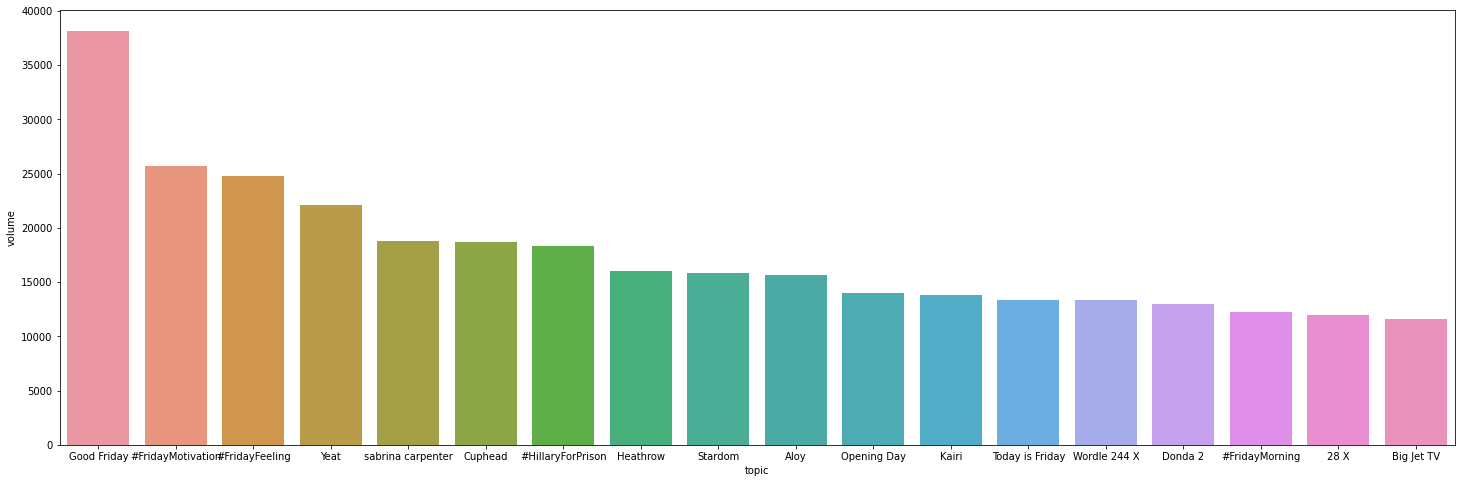

In [72]:
fig,ax = plt.subplots(figsize = (25,8))
sns.barplot(x = 'topic',y = 'volume',data = trending_place)

In [87]:
# Tweets from a indivisual user
# BarackObama -> positive
# justinbieber -> neutral
# UTDTrey -> negative
posts = api.user_timeline(screen_name = 'justinbieber',count = 100,lang = 'en',twitter_mode = 'extended')

In [88]:
for i in posts[0:5]:
  print(i.text)

Go for the Gold, Ladies!!!!!! Cannot wait to watch some of the best hockey ever!!! We are so proud of you! @HockeyCanada
RT @weverseofficial: [#2022WeverseCon] Countdown D-DAY
▶https://t.co/yEFJDQv1EG

Ticket sale ends 31 Dec, 7:30 PM (KST)
👉https://t.co/p6OqR…
The countdown begins… https://t.co/S5qZP92Ziz
RT @weverseofficial: [#2022WeverseCon] Countdown D-1 - @pledis_17
▶https://t.co/0NwYPqQzuC

#세븐틴 #SEVENTEEN #SVT #New_Era
RT @inBetweenersNFT: Hey @justinbieber if you’re in the Discord, you should give us a sign.

https://t.co/KtgZM54CpV


In [89]:
# Dataframe

df_people = pd.DataFrame([i.text for i in posts],columns = ['Tweets'])

df_people.head()

,Tweets
0,"Go for the Gold, Ladies!!!!!! Cannot wait to w..."
1,RT @weverseofficial: [#2022WeverseCon] Countdo...
2,The countdown begins… https://t.co/S5qZP92Ziz
3,RT @weverseofficial: [#2022WeverseCon] Countdo...
4,RT @inBetweenersNFT: Hey @justinbieber if you’...


In [90]:
# Clean text function

# re is used to check if a particular string matches a given regular expression
# sub is used to substutite the elements on the left by those on the right
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove mentions
  text = re.sub(r'#','',text) # Remove #
  text = re.sub(r'RT[\s]+','',text) # Remove RTs
  text = re.sub(r'https?:\/\/\S+','',text) # Remove hyperlink
  text = re.sub(r'\n','',text)  # remove \n
  return text
# Clean the text
df_people['Tweets'] = df_people['Tweets'].apply(cleantxt)

# Show Clean Text
df_people.head()

,Tweets
0,"Go for the Gold, Ladies!!!!!! Cannot wait to w..."
1,: [2022WeverseCon] Countdown D-DAY▶Ticket sale...
2,The countdown begins…
3,: [2022WeverseCon] Countdown D-1 - _17▶세븐틴 SEV...
4,": Hey if you’re in the Discord, you should gi..."


In [91]:
# TextBlob is used to determine the attitude or the emotion of the writer
# subjectivity [0:1] is the amount of personal opinion and factual info contained in the text
# higher value of subjectivity means more personal opinion rather than factual info.
# polarity [-1:1] defines how positive a statement is. 1 is positive and -1 is negative

# Create A Function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

  # Add these in the dataframe
df_people['Subjectivity'] = df_people['Tweets'].apply(getSubjectivity)
df_people['Polarity'] = df_people['Tweets'].apply(getPolarity)


df_people

,Tweets,Subjectivity,Polarity
0,"Go for the Gold, Ladies!!!!!! Cannot wait to w...",0.650000,1.000000
1,: [2022WeverseCon] Countdown D-DAY▶Ticket sale...,1.000000,-0.750000
2,The countdown begins…,0.000000,0.000000
3,: [2022WeverseCon] Countdown D-1 - _17▶세븐틴 SEV...,1.000000,-0.750000
4,": Hey if you’re in the Discord, you should gi...",0.000000,0.000000
...,...,...,...
95,: . was all smiles as he hit the stage with t...,0.300000,1.000000
96,"Experience ""Ghost"" in Atmos 🤍",0.000000,0.000000
97,: And then there were 2! The finalists are vs...,0.377273,0.568182
98,: VOTE FOR “STAY” FOR SONG OF THE SUMMER 💜💜 ...,0.000000,0.000000


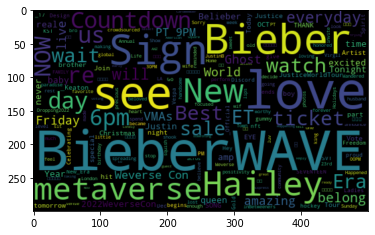

In [92]:
# Word Cloud is a data visualitation technique used for representing text data in which size of each word indicates its freq and importance
# Plotting them
allWords = ' '.join( [twts for twts in df_people['Tweets']])
# join all words
wordCloud = WordCloud(width = 500,height = 300,random_state = 21,max_font_size = 119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')


In [93]:
# Create a function to compute the negative,neutral and positive analysis

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_people['Analysis'] = df_people['Polarity'].apply(getAnalysis)

df_people.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Go for the Gold, Ladies!!!!!! Cannot wait to w...",0.65,1.00,Positive
1,: [2022WeverseCon] Countdown D-DAY▶Ticket sale...,1.00,-0.75,Negative
2,The countdown begins…,0.00,0.00,Neutral
3,: [2022WeverseCon] Countdown D-1 - _17▶세븐틴 SEV...,1.00,-0.75,Negative
4,": Hey if you’re in the Discord, you should gi...",0.00,0.00,Neutral


In [94]:
# Print all positive tweets

j = 1
sorteddf = df_people.sort_values('Polarity')
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i] == 'Positive'):
    print(str(j)+') ' +sorteddf['Tweets'][i])
    print()
    j= j+1

1) Go for the Gold, Ladies!!!!!! Cannot wait to watch some of the best hockey ever!!! We are so proud of you! 

2) _Official: “Justin Bieber X Vespa”.⁣ Celebrating the Spirit of Freedom &amp; the Love of Design.⁣Dropping2022  JustinB…

3) : We're excited to announce inBetweeners, a global crowdsourced community focused on spreading love and positivity acros…

4) LOVE MY FAMILY. 📷:  

5) : 🎉2022 Weverse Con [New Era] is here!We invite YOU to do the New Year Countdown with your favorite artists on Weverse…

6) : 🎉2022 Weverse Con [New Era] 공연 개최 안내팬과 아티스트가 함께하는 위버스 의 새해 카운트다운 공연에 팬 여러분을 초대합니다.‘2022 Weverse Con [New Era]’에서 우리…

7) We lost a real one, rest in paradise king.  ❤️ 

8) How r u real and why did you decide i was worthy to be your husband I’m shook everyday love u baby . 

9) You my queen are more than enough for me and I will spend everyday making you feel like the queen that you are. As… 

10) You are my forever. Life has never made more sense until you became my wife. I will

In [95]:
# Print all negative tweets

j = 1
sorteddf = df_people.sort_values('Polarity',ascending = False)
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i] == 'Negative'):
    print(str(j)+') ' +sorteddf['Tweets'][i])
    print()
    j= j+1

1) : [2022WeverseCon] Countdown D-DAY▶Ticket sale ends 31 Dec, 7:30 PM (KST)👉

2) : [2022WeverseCon] Countdown D-1 - _17▶세븐틴 SEVENTEEN SVT New_Era

3) : Sorry, but it's time to watch  going in on this week’s So That Happened. Show us your level of Belieber on …

4) “Lonely Christmas” 🌵❄️🎄🎅🏻     



In [96]:
#  Values of 
def value_func(cols):
  print('The mean of '+ cols +' is:',df_people[cols].mean())
  print('The median of '+ cols +' is:',df_people[cols].median())
  print('The quartile values of '+ cols +' is:',np.percentile(df_people[cols],[25,50,75]))
  print('The standard deviation  of '+ cols +' is:',df_people[cols].std())

In [97]:
value_func('Subjectivity')

The mean of Subjectivity is: 0.2122420033670034
The median of Subjectivity is: 0.0
The quartile values of Subjectivity is: [0.  0.  0.5]
The standard deviation  of Subjectivity is: 0.31594328833034213


In [98]:
value_func('Polarity')

The mean of Polarity is: 0.08941329966329967
The median of Polarity is: 0.0
The quartile values of Polarity is: [0.         0.         0.12020202]
The standard deviation  of Polarity is: 0.2636636430151869


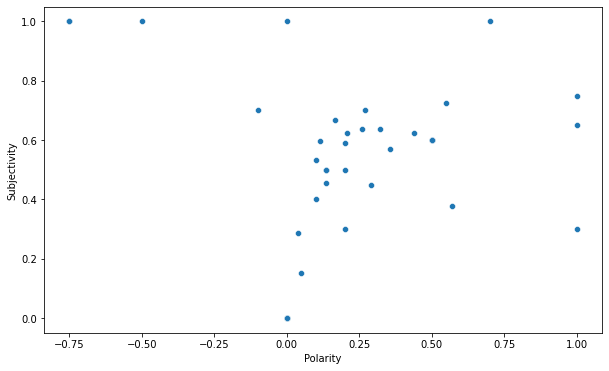

In [99]:
# Plot the polarity and subjectivity

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Polarity',y = 'Subjectivity',data = df_people)

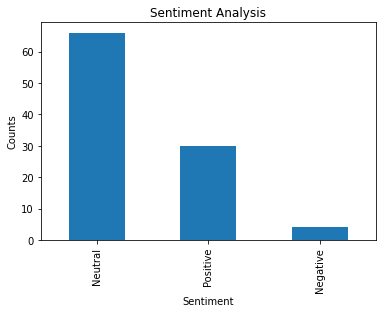

In [100]:
# Plot the tweet's nature

df_people['Analysis'].value_counts().plot(kind = 'bar')
plt.ylabel ('Counts')
plt.xlabel ('Sentiment')
plt.title ('Sentiment Analysis')
plt.show()